In [1]:
from os import getcwd
from pandas import DataFrame, read_csv, get_dummies
from scipy.stats import zscore
from matplotlib.pyplot import figure
from seaborn import set_theme,barplot,countplot,heatmap,violinplot,boxplot
from numpy import abs,median,around
%matplotlib inline

In [2]:
set_theme(context="notebook",style='darkgrid', palette='inferno')

In [3]:
df = read_csv(getcwd()[:getcwd().find("individual_impacts")] + "Engineering_graduate_salary.csv")

In [4]:
df = df.filter(items=["Specialization","Salary"])

In [5]:
df["Salary"] = df["Salary"].replace([df["Salary"][(abs(zscore(df["Salary"])) > 3)]], median(df["Salary"]))

Text(0.5, 1.0, 'Count Plot of Specialization')

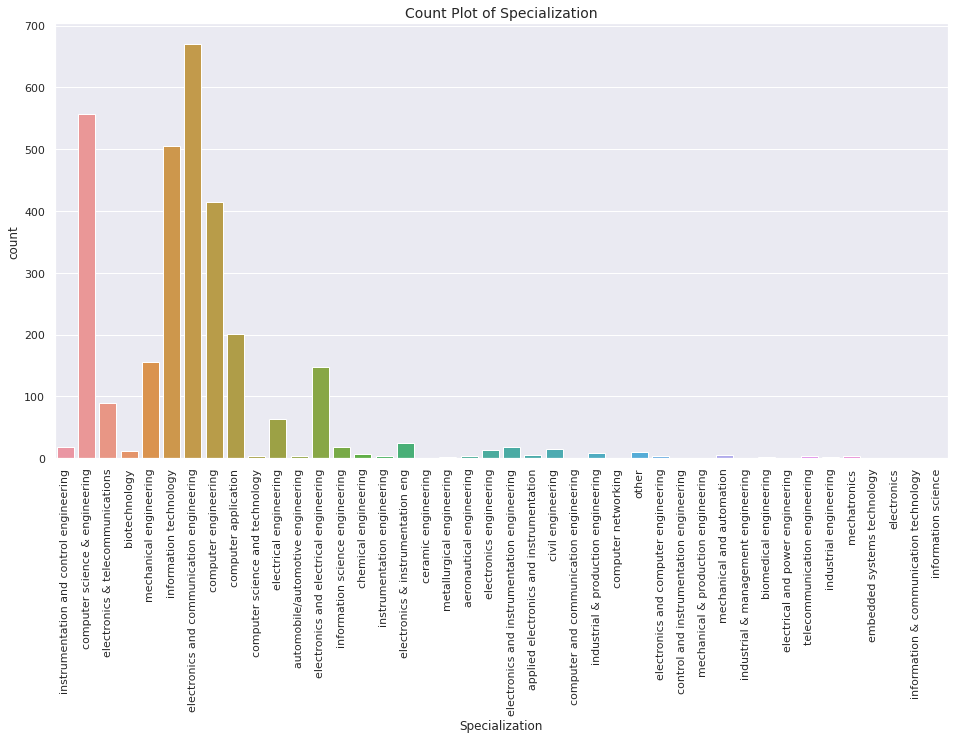

In [6]:
figure(figsize=(16,8))
plot = countplot(x=df["Specialization"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Count Plot of Specialization", fontsize=14)

In [7]:
specializations = df["Specialization"].value_counts()
specializations

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [8]:
rare_specializations = specializations[specializations <= 10]
rare_specializations

other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & production engineerin

In [9]:
def remove_rare_specialization(value):
    if value in rare_specializations:
        return 'other'
    else:
        return value
df["Specialization"] = df["Specialization"].apply(remove_rare_specialization)
df["Specialization"].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

Text(0.5, 1.0, 'Count Plot of Specialization')

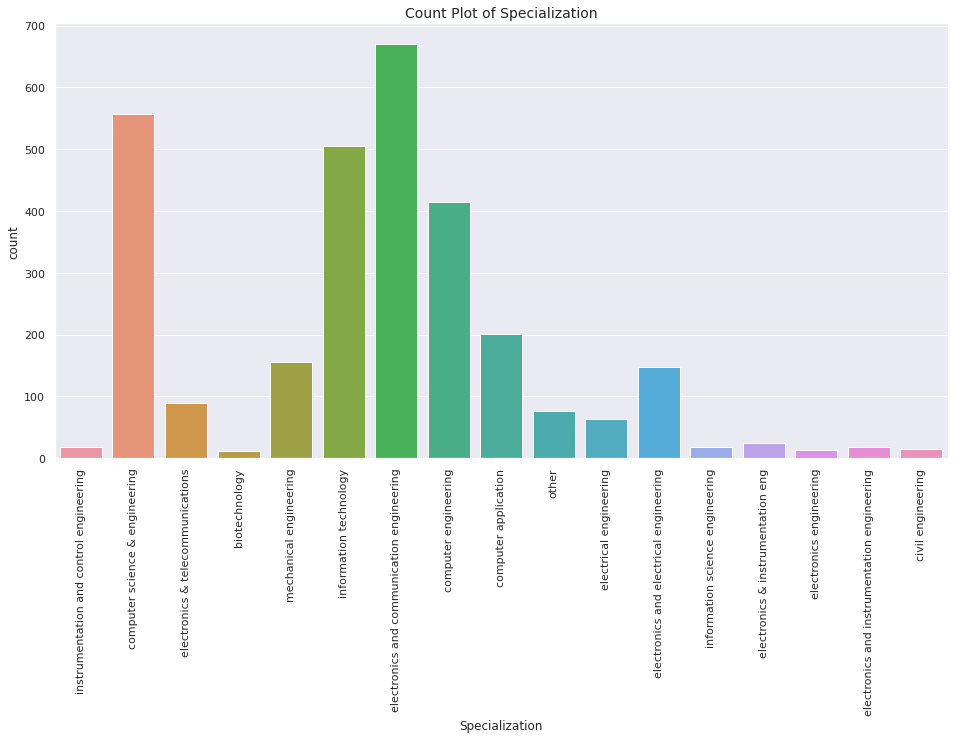

In [10]:
figure(figsize=(16,8))
plot = countplot(x=df["Specialization"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Count Plot of Specialization", fontsize=14)

Text(0.5, 1.0, 'Violin Plot of Specialization with Salary')

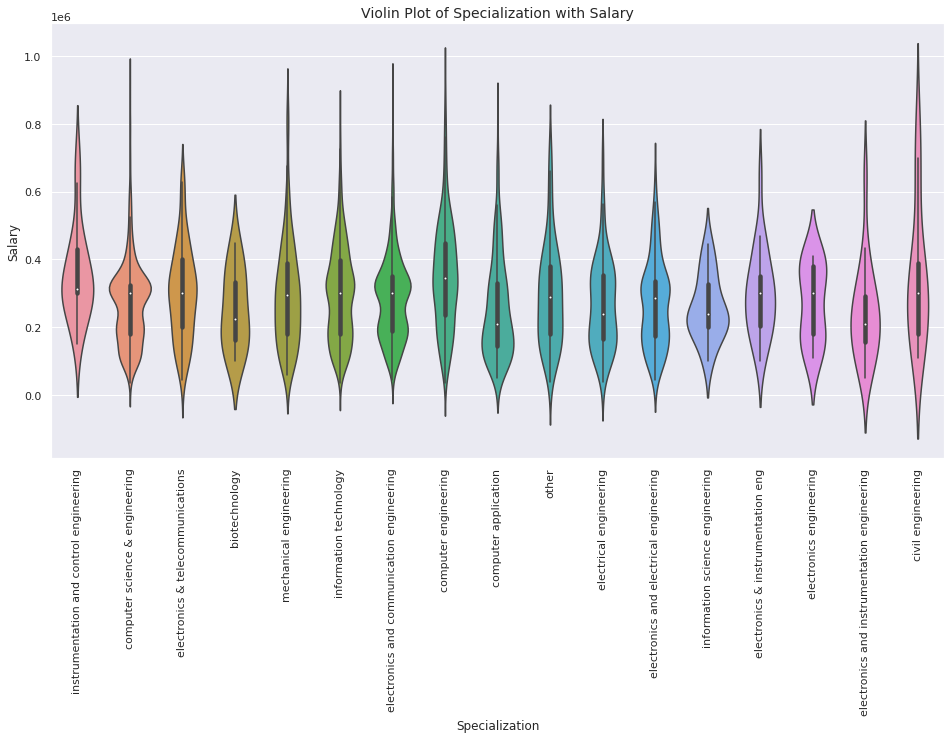

In [11]:
figure(figsize=(16,8))
plot = violinplot(x=df["Specialization"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Violin Plot of Specialization with Salary", fontsize=14)

Text(0.5, 1.0, 'Bar Plot of Specialization with Salary')

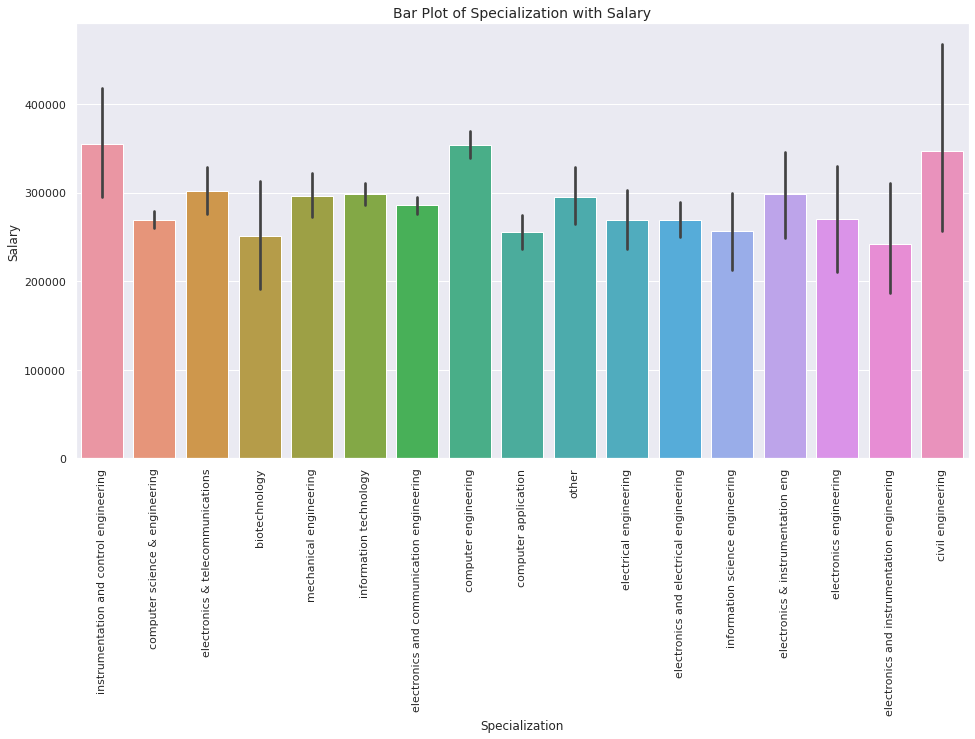

In [12]:
figure(figsize=(16,8))
plot = barplot(x=df["Specialization"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of Specialization with Salary", fontsize=14)

Text(0.5, 1.0, 'Box Plot of Specialization with Salary')

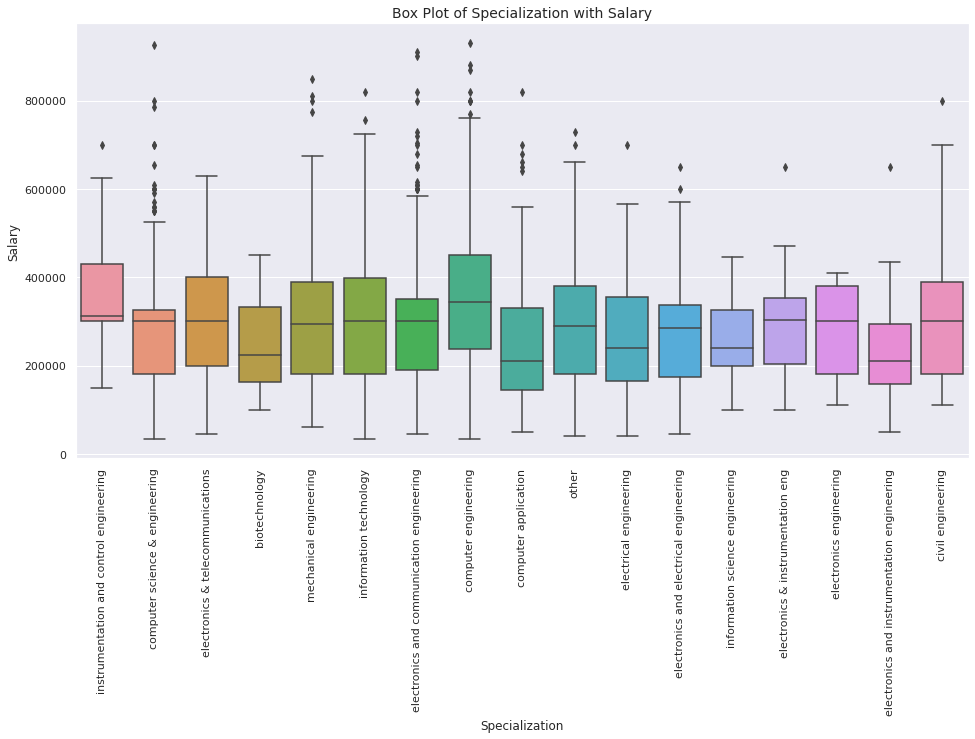

In [13]:
figure(figsize=(16,8))
plot = boxplot(x=df["Specialization"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Box Plot of Specialization with Salary", fontsize=14)

In [14]:
df = get_dummies(df, columns=["Specialization"], prefix="specialization")

Text(0.5, 1.0, 'Correlation Matrix')

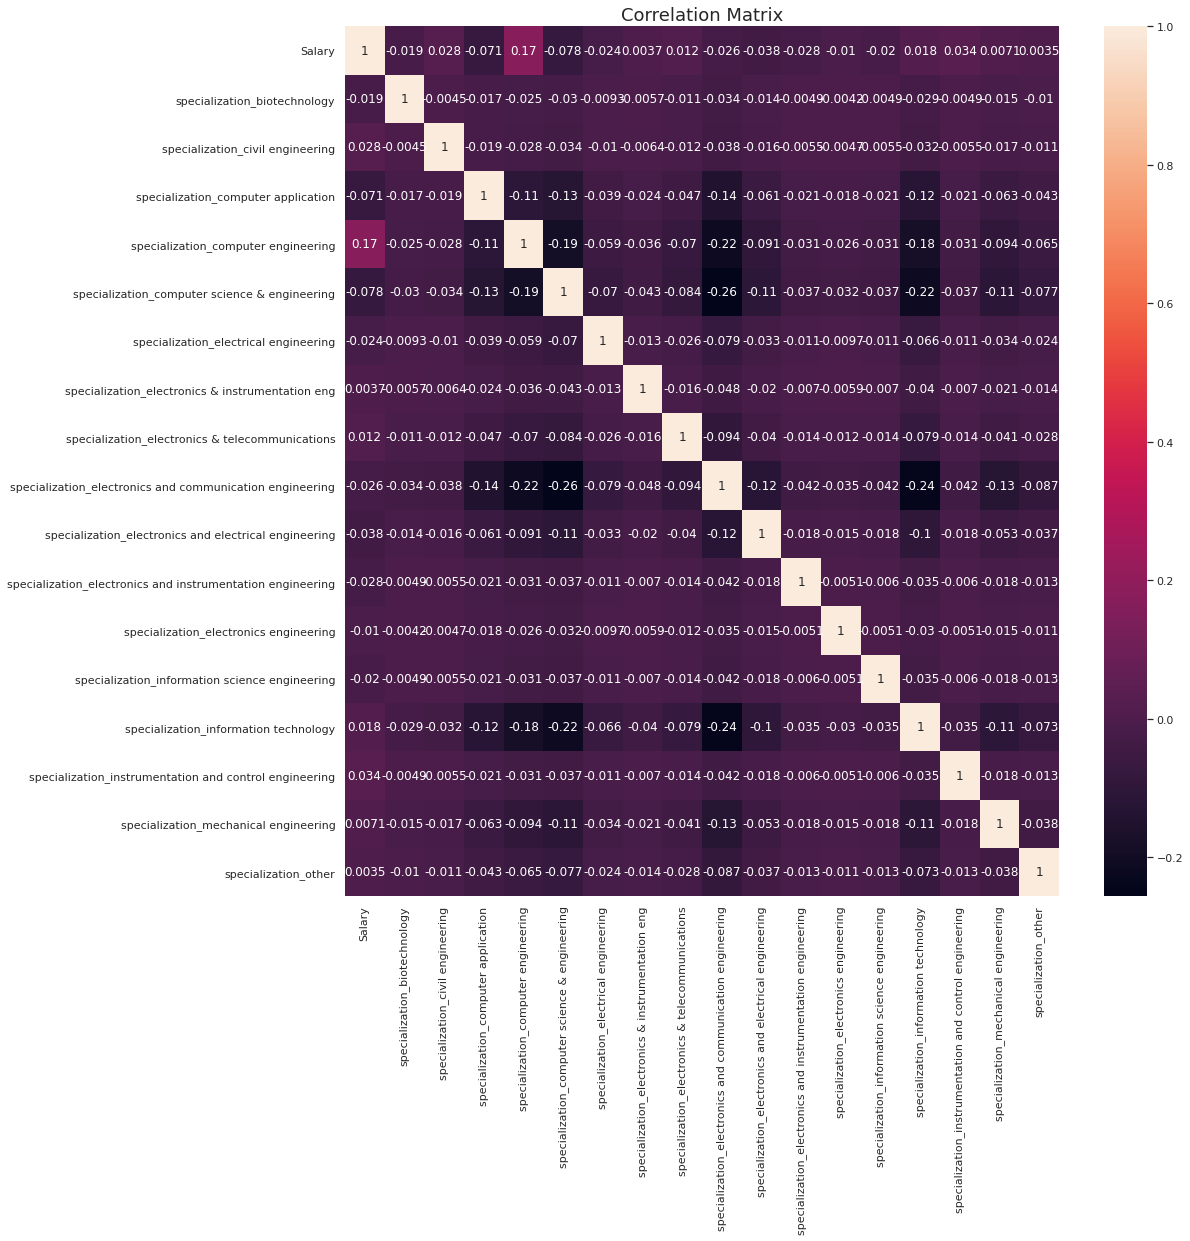

In [15]:
figure(figsize=(16,16))
plot = heatmap(df.corr(), annot=True)
plot.set_title("Correlation Matrix", fontsize=18)

In [16]:
specializations = df.columns.tolist()
specializations.remove('Salary')
specializations

['specialization_biotechnology',
 'specialization_civil engineering',
 'specialization_computer application',
 'specialization_computer engineering',
 'specialization_computer science & engineering',
 'specialization_electrical engineering',
 'specialization_electronics & instrumentation eng',
 'specialization_electronics & telecommunications',
 'specialization_electronics and communication engineering',
 'specialization_electronics and electrical engineering',
 'specialization_electronics and instrumentation engineering',
 'specialization_electronics engineering',
 'specialization_information science engineering',
 'specialization_information technology',
 'specialization_instrumentation and control engineering',
 'specialization_mechanical engineering',
 'specialization_other']

In [17]:
corelations = {}

for specialization in specializations:
    corelations[specialization] = df[specialization].corr(df["Salary"])

frame = DataFrame({
    "Specialization": corelations.keys(),
    "Corr": corelations.values()
})

frame

,Specialization,Corr
0,specialization_biotechnology,-0.018645
1,specialization_civil engineering,0.027860
2,specialization_computer application,-0.070892
3,specialization_computer engineering,0.174789
4,specialization_computer science & engineering,-0.078292
5,specialization_electrical engineering,-0.023864
6,specialization_electronics & instrumentation eng,0.003687
7,specialization_electronics & telecommunications,0.012053
8,specialization_electronics and communication e...,-0.025921
9,specialization_electronics and electrical engi...,-0.037848


In [18]:
dic = {}

for specialization in specializations:
    selected = df[df[specialization] == 1]
    
    students_in_specialization = selected.shape[0]

    to_3 = 0
    to_6 = 0
    to_inf = 0
    for salary in selected['Salary']:
        if (salary < 300000) :
            to_3 = to_3 + 1
        elif (salary >= 300000  and salary < 600000):
            to_6 = to_6 + 1
        else:
            to_inf = to_inf + 1
    
    dic[specialization] = {
        "0 to 300000": around(abs(to_3 / students_in_specialization), decimals=1),
        "300000 to 600000": around(abs(to_6 / students_in_specialization), decimals=1),
        "600000 or more": around(abs(to_inf / students_in_specialization), decimals=1)
        }

package_frame = DataFrame(dic)

package_frame

,specialization_biotechnology,specialization_civil engineering,specialization_computer application,specialization_computer engineering,specialization_computer science & engineering,specialization_electrical engineering,specialization_electronics & instrumentation eng,specialization_electronics & telecommunications,specialization_electronics and communication engineering,specialization_electronics and electrical engineering,specialization_electronics and instrumentation engineering,specialization_electronics engineering,specialization_information science engineering,specialization_information technology,specialization_instrumentation and control engineering,specialization_mechanical engineering,specialization_other
0 to 300000,0.6,0.5,0.6,0.3,0.5,0.5,0.5,0.4,0.5,0.5,0.7,0.5,0.7,0.5,0.2,0.5,0.5
300000 to 600000,0.4,0.3,0.4,0.6,0.5,0.4,0.5,0.5,0.5,0.5,0.2,0.5,0.3,0.5,0.7,0.4,0.4
600000 or more,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.1


# From above data and analysis we can deduce 

### ***6 out of 10*** Computer Engineering students have recieved packages between ***3 - 6 lakh***

### Computer Engineering students averagely recieved highest packages
- 1 out of 10 students recieved packages above ***6 lakh***
- 6 out of 10 students recieved packages between ***3 - 6 lakh***
- 3 out of 10 students recieved packages upto ***3 lakh***